<h2>PCD_Assignment01</h2> <p>
Nama : A. Rifqi Afwan Muslihani <p>
NIM  : 20/462174/PA/20146 <p>
Using Google Colab, please try to a program for following tasks:

<h3>Image histogram</h3><p>
Non-Uniform Quantization <p>
Create your notebook with name as "PCD_Assignment01". You need to provide your Google Colab's code link to the text editor in submission form. <p>

Import Libraries and Image

In [ ]:
import cv2 as cv #cv2 : image import and color manipulation
import matplotlib.pyplot as plt #matplotlib : image display, histogram, and show result
import numpy as np #numpy : array manipulation and algorithm

# Change filepath to your desired image
filepath = 'HabibieAinun.jpeg'
img = cv.imread(filepath)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # RGB image
imgbnw = cv.cvtColor(img, cv.COLOR_RGB2GRAY) # Grayscale image

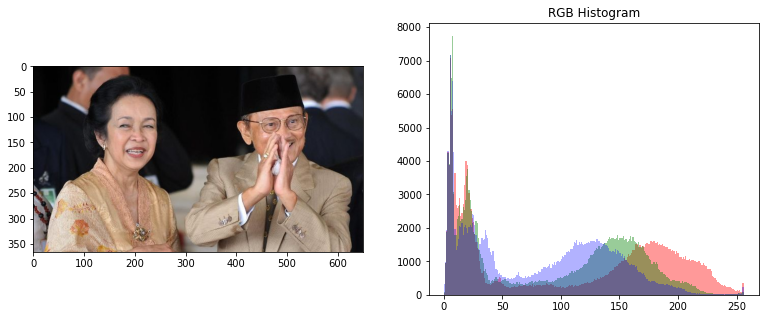

In [ ]:
plt.figure(figsize=(13,5))
plt.title('RGB Image')
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.title('RGB Histogram')
plt.hist(img[:,:,0].ravel(), bins=256, range=(0, 256), color='red', alpha = 0.4)
plt.hist(img[:,:,1].ravel(), bins=256, range=(0, 256), color='green', alpha = 0.4)
plt.hist(img[:,:,2].ravel(), bins=256, range=(0, 256), color='blue', alpha = 0.3)
plt.show()

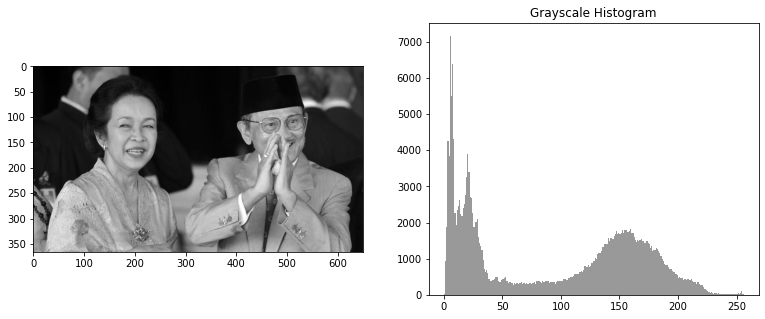

In [ ]:
plt.figure(figsize=(13,5))
plt.title('Grayscale Image')
plt.subplot(121)
plt.imshow(imgbnw, cmap='gray')
plt.subplot(122)
plt.title('Grayscale Histogram')
plt.hist(imgbnw.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

<h3>Non Uniform Quantization Algorithm</h3>

In [ ]:
def meanQuan(K):
    # Make new sorted array of imgbnw 
    imgsorted = imgbnw.copy()
    imgsorted = imgsorted.ravel()
    imgsorted.sort()

    # Make new empty list for indexing, with start and end
    arrindex = []
    arrindex.append([])
    arrindex[-1].append(0)
    arrindex[-1].append(0)
    arrindex.append([])
    arrindex[-1].append(len(imgsorted))
    arrindex[-1].append(256)

    # Fill array arrindex based on image data and K
    for i in range(int(np.log2(K))):
        length = len(arrindex)
        for i in range(length-1):
            # Get the partial list to work with
            partiallst = imgsorted[int(arrindex[i][0]):int(arrindex[i+1][0])]
            # Get index of last mean value in list. Return index+1 of the value
            where = np.where(imgsorted == int(partiallst.mean()))[0][-1]+1
            # Insert index and value of mean to arrindex
            arrindex.append([])
            arrindex[-1].append(where)
            arrindex[-1].append(int(partiallst.mean()))
        arrindex.sort()

    # Get mean value for each part of the graph
    for i in range (len(arrindex)-1):
        partiallst = imgsorted[int(arrindex[i][0]):int(arrindex[i+1][0])]
        arrindex[i+1].append(int(partiallst.mean()))

    # Create copy of imgbnw
    imgbnwquantized = imgbnw.copy()

    # Structure:
    # 
    # array.shape[rows][column]
    # 
    #   -----> column
    #  |
    #  |
    #  v
    # rows
    rows = imgbnwquantized.shape[0]
    cols = imgbnwquantized.shape[1]

    for i in range (rows):
        for j in range (cols):
            # imgbnwquantized[i][j] = 125
            for k in range (len(arrindex)-1):
                if(imgbnwquantized[i][j] > arrindex[k][1]) and (imgbnwquantized[i][j] <= arrindex[k+1][1]):
                    imgbnwquantized[i][j] = arrindex[k+1][2]
                    break
                else:
                    continue 

    return imgbnwquantized

def medianQuan(K):
    # Make new sorted array of imgbnw 
    imgsorted = imgbnw.copy()
    imgsorted = imgsorted.ravel()
    imgsorted.sort()

    # Make new empty list for indexing, with start and end
    arrindex = []
    arrindex.append([])
    arrindex[-1].append(0)
    arrindex[-1].append(0)
    arrindex.append([])
    arrindex[-1].append(len(imgsorted))
    arrindex[-1].append(256)

    # Fill array arrindex based on image data and K
    for i in range(int(np.log2(K))):
        length = len(arrindex)
        for i in range(length-1):
            # Get the partial list to work with
            partiallst = imgsorted[int(arrindex[i][0]):int(arrindex[i+1][0])]
            # Get index of last median value in list. Return index+1 of the value
            where = np.where(imgsorted == int(np.median(partiallst)))[0][-1]+1
            # Insert index and value of mean to arrindex
            arrindex.append([])
            arrindex[-1].append(where)
            arrindex[-1].append(int(np.median(partiallst)))
        arrindex.sort()

    # Get mean value for each part of the graph
    for i in range (len(arrindex)-1):
        partiallst = imgsorted[int(arrindex[i][0]):int(arrindex[i+1][0])]
        arrindex[i+1].append(int(partiallst.mean()))

    # Create copy of imgbnw
    imgbnwquantized = imgbnw.copy()

    # Structure:
    # 
    # array.shape[rows][column]
    # 
    #   -----> column
    #  |
    #  |
    #  v
    # rows
    rows = imgbnwquantized.shape[0]
    cols = imgbnwquantized.shape[1]

    for i in range (rows):
        for j in range (cols):
            # imgbnwquantized[i][j] = 125
            for k in range (len(arrindex)-1):
                if(imgbnwquantized[i][j] > arrindex[k][1]) and (imgbnwquantized[i][j] <= arrindex[k+1][1]):
                    imgbnwquantized[i][j] = arrindex[k+1][2]
                    break
                else:
                    continue 
    
    return imgbnwquantized

def showQuan(the_img, imgname, K, val):
    the_title = str(imgname + " Quantized with " + val + " -- K = " + str(K))

    plt.figure(figsize=(13,5))
    plt.title('Grayscale Image')
    plt.subplot(121)
    plt.title(the_title)
    plt.imshow(the_img, cmap='gray')
    plt.subplot(122)
    plt.title(the_title)
    plt.hist(the_img.ravel(), bins=256, range=(0, 256), color='black', alpha=0.7)
    plt.show()

def meanQuantization(K, imgname):
    val = "Mean"
    showQuan(meanQuan(K),imgname, K, val)

def medianQuantization(K, imgname):
    val = "Median"
    showQuan(medianQuan(K),imgname, K, val)

<h3>Usage </h3> <p>
To customize your output:<p>

Choose quantization method to use, K value, and title<p>
Change title in the first line, replacing default string<p>
Median method : medianQuantization(K,title)<p>
Mean method : meanQuantization(K,title)<p>

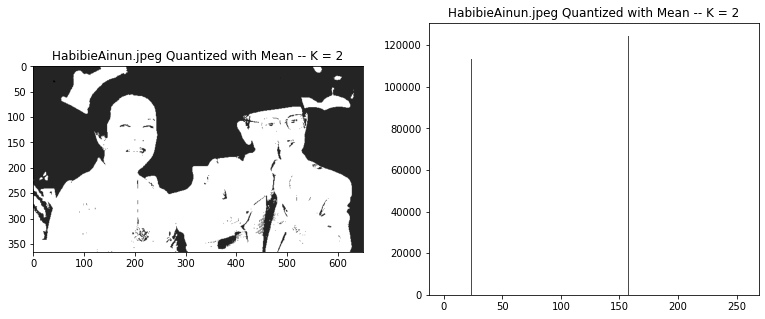

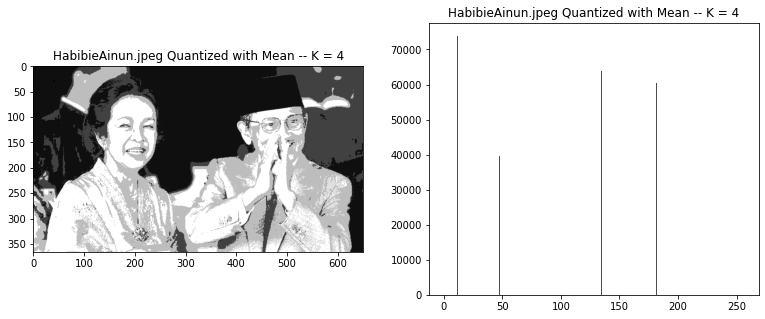

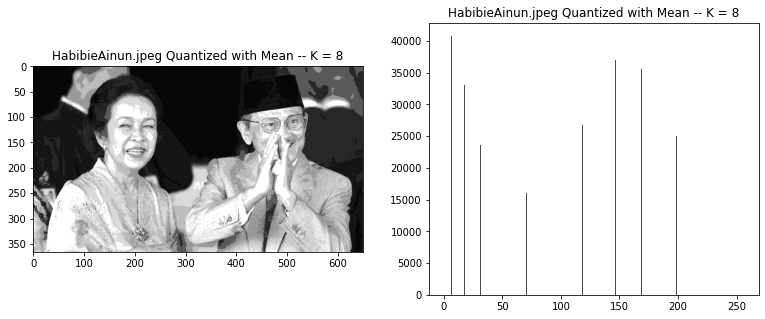

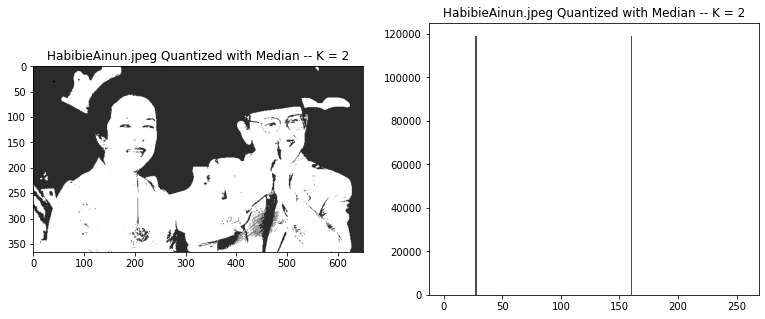

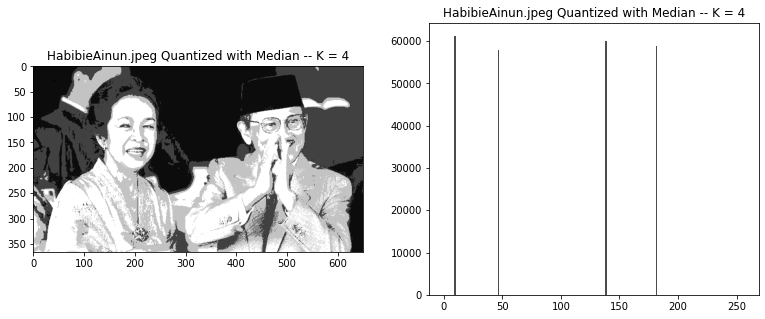

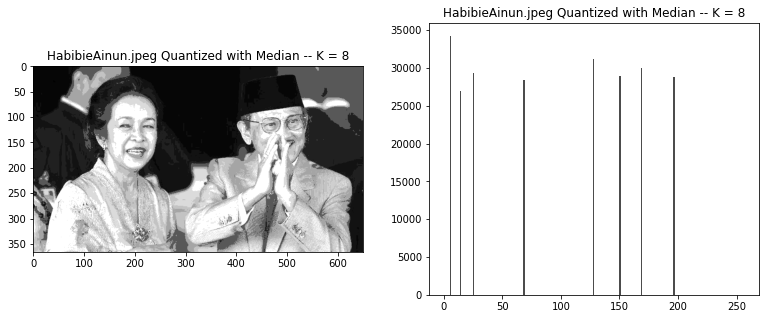

In [ ]:
img_name = 'HabibieAinun.jpeg'
meanQuantization(2,img_name)
meanQuantization(4,img_name)
meanQuantization(8,img_name)
medianQuantization(2,img_name)
medianQuantization(4,img_name)
medianQuantization(8,img_name)